In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import plot_k_means, get_simple_data
from datetime import datetime

In [15]:
def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('./large_files/train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
          X, Y = X[:limit], Y[:limit]
    return X, Y

In [4]:
def purity2(Y, R):
    # maximum purity is 1, higher is better
    C = np.argmax(R, axis=1) # cluster assignments

    N = len(Y) # number of data pts
    K = len(set(Y)) # number of labels

    total = 0.0
    for k in range(K):
        max_intersection = 0
        for j in range(K):
            intersection = ((C == k) & (Y == j)).sum()
            if intersection > max_intersection:
                max_intersection = intersection
        total += max_intersection
    return total / N

In [6]:
def purity(Y, R):
    # maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 # we don't strictly need to store this
        max_intersection = 0
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N

In [7]:
# hard labels
def DBI2(X, R):
    N, D = X.shape
    _, K = R.shape

    # get sigmas, means first
    sigma = np.zeros(K)
    M = np.zeros((K, D))
    assignments = np.argmax(R, axis=1)
    for k in range(K):
        Xk = X[assignments == k]
        M[k] = Xk.mean(axis=0)
        # assert(Xk.mean(axis=0).shape == (D,))
        n = len(Xk)
        diffs = Xk - M[k]
        sq_diffs = diffs * diffs
        sigma[k] = np.sqrt( sq_diffs.sum() / n )


    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K

In [8]:
def DBI(X, M, R):
    # ratio between sum of std deviations between 2 clusters / distance between cluster means
    # lower is better
    N, D = X.shape
    K, _ = M.shape

    # get sigmas first
    sigma = np.zeros(K)
    for k in range(K):
        diffs = X - M[k] # should be NxD
        squared_distances = (diffs * diffs).sum(axis=1) # now just N
        weighted_squared_distances = R[:,k]*squared_distances
        sigma[k] = np.sqrt( weighted_squared_distances.sum() / R[:,k].sum() )

    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K


Reading in and transforming data...
Number of data points: 10000
Final cost 397094.400400374
Purity: 0.5785084974663146
Purity 2 (hard clusters): 0.5783
DBI: 2.853304298512296
DBI 2 (hard clusters): 2.852114619355143


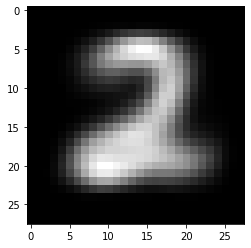

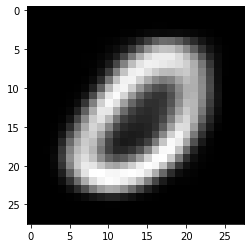

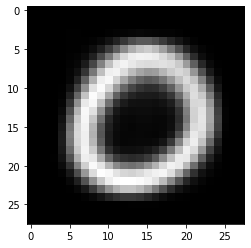

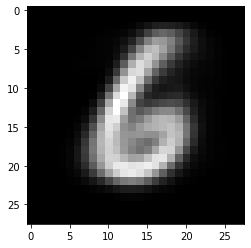

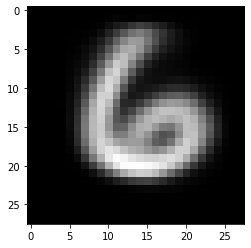

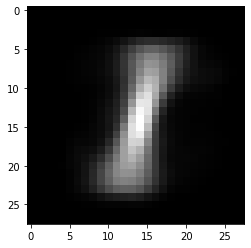

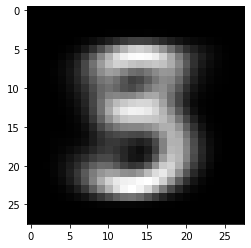

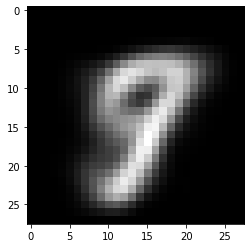

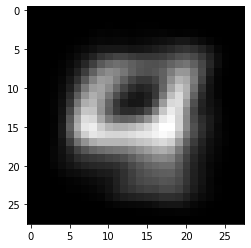

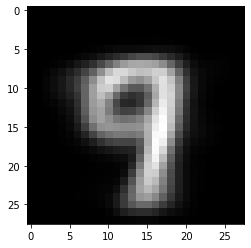

In [16]:
# mnist data
X, Y = get_data(10000)

# simple data
# X = get_simple_data()
# Y = np.array([0]*300 + [1]*300 + [2]*300)

print("Number of data points:", len(Y))
M, R = plot_k_means(X, len(set(Y)))
# Exercise: Try different values of K and compare the evaluation metrics
print("Purity:", purity(Y, R))
print("Purity 2 (hard clusters):", purity2(Y, R))
print("DBI:", DBI(X, M, R))
print("DBI 2 (hard clusters):", DBI2(X, R))

# plot the mean images
# they should look like digits
for k in range(len(M)):
    im = M[k].reshape(28, 28)
    plt.imshow(im, cmap='gray')
    plt.show()